# Probability of having a sister

## Question:

https://platform.stratascratch.com/technical/2368-probability-of-having-a-sister?tabname=question

Assume the distribution of children per family is as given in the table below:


| n_children | 0   | 1    | 2   | 3    | 4   | >=5 |
|------------|-----|------|-----|------|-----|-----|
| p          | 0.3 | 0.25 | 0.2 | 0.15 | 0.1 | 0   |

Consider a random girl in the population of children. What is the probability that she has a sister?

## (wrong) Solution

### Strategy:

1) We assume that the probability of a child being boy/girl is independent and equal
2) We are interested in the probability that a randomply picked girl in the children population has - at least - one sister. In other words, we are interested in the probability that in a family there are at least 2 girls, conditioned on the fact that there is at least one girl:

$$P(g \geq 2 | g \geq 1) = \frac{P(g \geq 2 \cap g \geq 1)}{P(g \geq1)}= \frac{P(g \geq 2)}{P(g \geq1)} $$

where the last equality holds because all families with at least 2 girls also have at least 1 girl.

We then have to compute $P(g\geq k)$ with $k=1,2$, as a function of the probability of a family having a number $n$ of children.

$$P(g \geq k) = \sum_{i=0,...,4} P (g \geq k | n = i) \cdot P(n=i)$$


$$\begin{aligned}P(g \geq 1) &= P (g \geq 1 | n = 1) \cdot P(n=1) +P (g \geq 1 | n = 2) \cdot P(n=2) + P (g \geq 1 | n = 3) \cdot P(n=3) + P (g \geq 1 | n = 4) \cdot P(n=4) =  \\
&= 0.5 \cdot P(n=1) + (1- 0.5^2) \cdot P(n=2) + (1-0.5^3) \cdot P(n=3) + (1-0.5^4) \cdot P(n=4) 
\end{aligned}$$

We then need to compute $P (g \geq 2 | n = i)$: for $n=2$ it's straihtforward, it's the probability that both children are girls, so $1/4$. What about $n=3 ,4$?

$$\begin{aligned}P(g \geq 2) &= P (g \geq 2 | n = 2) \cdot P(n=2) + P (g \geq 2 | n = 3) \cdot P(n=3) + P (g \geq 2 | n = 4) \cdot P(n=4) =  \\
&= 0.5^2 \cdot P(n=2) + 0.5^3 \cdot 4 \cdot P(n=3) + (1-0.5^4 \cdot 5) \cdot P(n=4) 
\end{aligned}$$

Plugging numbers we get:

$$P(g \geq 2 | g \geq 1) =  0.3875$$


## Right solution:

In order to answer the question we can recast it in the following way: if I pick a random girl in the pool of kids, what are the chances that she belongs in a family with more than 2 girls? This can be computed as a ratio between the number of girls that satisfy the requirement $N(g \geq 2)$ and the total number of girls $N(g)$

$$P(g \geq 2) = \frac{N(g \geq 2)}{N(g)}$$

The denominator $D$ is the total fraction of kids who are girls: it is given by the fraction of each $n$-kids-family, i.e. $P(n)$, multiplied by $n$, and then multiplied by $1/2$, since girls are half the total number of kids.

$$D=0.5*(\sum_n (nP(n)))$$

The numerator instead is more complicated: for each $n$, we consider the average number of girls in $n$-kids families having more than $2$ girls. As the sex of each kid is a random process, this number is given by a binomial distribution.

For example, the fraction of girls in families with 2 or more girls having a total of 2 kids is

$$G(2)=2 \cdot B(2,2,0.5) \cdot P(2)$$

where the first factor is because each of such families will have 2 girls, the second factor is the probability mass function of the binomial distribution 2 girls out of 2 kids with probability of 0.5 and the last factor is the fraction of families having 2 kids. 

The term for families with three kids is instead:

$$G(3)=P(3) \sum_{g=2}^3(g B(g,3,0.5))$$

the sum over g is because families with **more than** 2 girls can either have 2 or 3 girls, in this case.

Analogously, for 4-kids families:

$$G(4)=P(4) \sum_{g=2}^4(g B(g,4,0.5))$$

The total fraction, i.e. probability of picking a girl with at least a sister is therefore 

$$Prob=\frac{G(2)+G(3)+G(4)}{D}=\frac{\sum_{n=2}(\sum_{g=2}^n(g B(g,n,0.5)))}{0.5*(\sum_n (nP(n)))} \simeq 0.592$$



In [42]:
prob_distribution_base={0: 0.3, 1: 0.25, 2: 0.2, 3: 0.15, 4: 0.1, 5: 0}

In [43]:
prob_distribution = {0: 0.3, 1: 0.25, 2: 0.2, 3: 0.15, 4: 0.1, 5: 0}


In [44]:
import random
import pandas as pd
import numpy as np
from scipy.stats import binom


In [45]:
p=0.5 #probability of a kid being boy/girl

In [46]:
def compute_solution(prob_distribution,p=0.5):
    '''computes the analytic solution'''
    print('prob: ',prob_distribution)
    num=0
    for n in prob_distribution.keys():
        partial=0
        for i in np.arange(2,n+1):
            partial+=i*binom.pmf(i,n,p)
        if n>=2:
            aaa=partial*prob_distribution[n]
            num+=aaa
    den=0
    for n in prob_distribution.keys():
        den+=n*prob_distribution[n]
    den=den*0.5
    solution=num/den
    print('numerator = {}\ndenominator={}\nsolution={}'.format(num,den,solution))
    return solution


In [47]:
compute_solution(prob_distribution=prob_distribution)

prob:  {0: 0.3, 1: 0.25, 2: 0.2, 3: 0.15, 4: 0.1, 5: 0}
numerator = 0.4437500000000001
denominator=0.75
solution=0.5916666666666668


0.5916666666666668

## Simulation:

Now let's check if the result is right with a simple simullation:

In [48]:
def generate_sample(probdict,sample_size=100000):
    families = []
    for i in range(sample_size):
        n_children = random.choices(list(prob_distribution.keys()), weights=list(prob_distribution.values()))[0]
        family = {"n_children": n_children}
        if n_children > 0:
            family["n_girls"] =  np.random.binomial(n_children, 0.5)# the sex of each child is basically a coin toss, therefore we need to use a binomial distribution
            family["n_boys"] = n_children - family["n_girls"]
        else:
            family["n_girls"]=0
            family["n_boys"]=0
        families.append(family)
    return pd.DataFrame.from_dict(families)



In [49]:
df=generate_sample(prob_distribution,1000000)



array([[<AxesSubplot: title={'center': 'n_children'}>,
        <AxesSubplot: title={'center': 'n_girls'}>],
       [<AxesSubplot: title={'center': 'n_boys'}>, <AxesSubplot: >]],
      dtype=object)

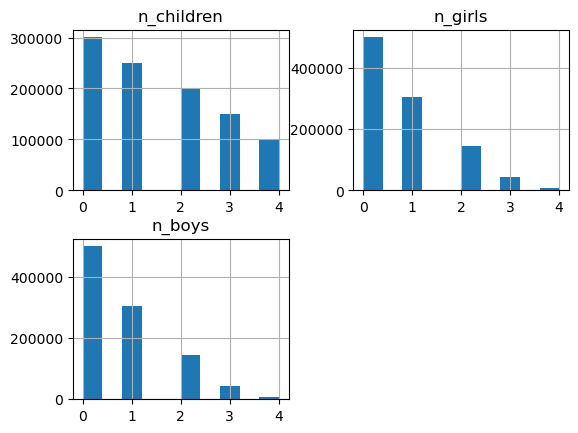

In [50]:
df.hist()

array([[<AxesSubplot: title={'center': 'n_children'}>,
        <AxesSubplot: title={'center': 'n_girls'}>],
       [<AxesSubplot: title={'center': 'n_boys'}>, <AxesSubplot: >]],
      dtype=object)

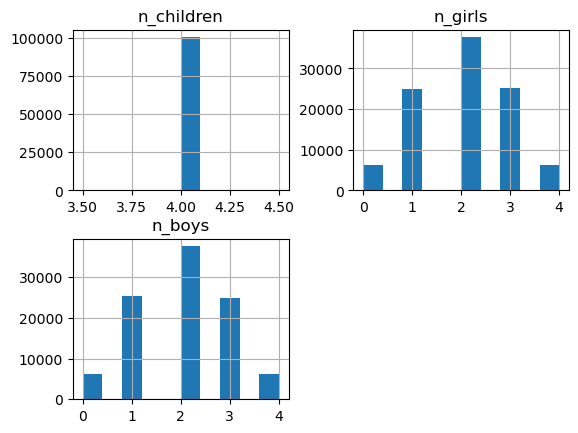

In [51]:
df[df['n_children']==4].hist()

In [52]:
#girls in families with more than 1 girl
g2=df[df['n_girls']>=2].sum()['n_girls']

totalgirls=df.sum()['n_girls']
totalgirls

750016

In [53]:
g2/totalgirls

0.5920140370338766